###***Dependencies***

In [1]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 
!pip install mmcv==0.4.3
%cd "/content"

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 26kB/s 
     |████████████████████████████████| 4.1MB 4.6MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 245kB 4.6MB/s 
     |████████████████████████████████| 194kB 14.5MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 13260 (delta 0), reused 0 (delta 0), pack-reused 13256
Receiving objects: 100% (13260/13260), 13.75 MiB | 34.44 MiB/s, done.
Resolving deltas: 100% (8963/8963), done.
Note: checking out '0f33c08d8d46eba8165715a0995841a975badfd4'.

You are in 'detache

Streaming output truncated to the last 5000 lines.
   ^~~~~~~~
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:25:3: note: in expansion of macro ‘CHECK_CONTIGUOUS’
   CHECK_CONTIGUOUS(x)
   ^~~~~~~~~~~~~~~~
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:34:3: note: in expansion of macro ‘CHECK_INPUT’
   CHECK_INPUT(col);
   ^
In file included from /usr/local/lib/python3.6/dist-packages/torch/include/c10/core/Device.h:5:0,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/c10/core/Allocator.h:6,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/ATen/ATen.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/types.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader_options.h:4,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/base.h:3,
    

     |████████████████████████████████| 2.1MB 4.5MB/s 
  Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully uninstalled Pillow-6.2.2


     |████████████████████████████████| 61kB 3.3MB/s 
  Created wheel for mmcv: filename=mmcv-0.4.3-cp36-cp36m-linux_x86_64.whl size=170845 sha256=5fe36712b934947bde22419fcfd0bcbd33c9121a0f7f6a53da0f658dab4ea70d
  Stored in directory: /root/.cache/pip/wheels/1e/c3/ee/7eddece4815cfe949be3d489912d22465e244260b587bb05e1
Successfully built mmcv
  Found existing installation: mmcv 1.1.2
    Uninstalling mmcv-1.1.2:
      Successfully uninstalled mmcv-1.1.2
/content


###***Restart Runtime***

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
!wget https://raw.githubusercontent.com/DevashishPrasad/CascadeTabNet/master/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py

--2020-09-19 13:40:49--  https://raw.githubusercontent.com/DevashishPrasad/CascadeTabNet/master/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8814 (8.6K) [text/plain]
Saving to: ‘cascade_mask_rcnn_hrnetv2p_w32_20e.py’

cascade_mask_rcnn_h 100%[===================>]   8.61K  --.-KB/s    in 0s      

2020-09-19 13:40:50 (110 MB/s) - ‘cascade_mask_rcnn_hrnetv2p_w32_20e.py’ saved [8814/8814]



###***Download Pre-trained model***

In [2]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
664MB [00:03, 175MB/s]


###***Required Packages***



In [3]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import numpy as np
import os
import cv2
import glob


In [5]:
# Making input_img folder which contains all the images
if not os.path.exists('input_img'):                 
    os.makedirs('input_img')
# Making input_img folder which contain all the predicted images
if not os.path.exists('output_img'):                
    os.makedirs('output_img')

###***Load model***

In [4]:

config_file = 'cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = 'epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')
if hasattr(model, 'module'):
  model = model.module

###***Upload your images***

In [6]:
%cd input_img/
from google.colab import files              # You can select multiple files at once
uploaded = files.upload()
%cd ../

/content/input_img


Saving t0.jpg to t0.jpg
Saving t2.jpg to t2.jpg
Saving t3.jpg to t3.jpg
Saving t5.jpg to t5.jpg
Saving t6.jpg to t6.jpg
Saving t7.jpg to t7.jpg
Saving t9.jpg to t9.jpg
Saving t11.jpg to t11.jpg
Saving t12.png to t12.png
Saving t19.jpg to t19.jpg
Saving t20.jpg to t20.jpg
Saving t23.jpg to t23.jpg
Saving t25.png to t25.png
/content


###***Detection of Tables***

In [7]:
image_paths = glob.glob('input_img/*')                       #path to input folder

score_thr= 0.20                                                       
for img_path in image_paths:
  # Run Inference
  result = inference_detector(model, img_path)
  demo_img = mmcv.imread(img_path)
  output = demo_img.copy()
  bbox_result, _ = result
  bboxes = np.vstack(bbox_result)
  assert bboxes.ndim == 2
  assert bboxes.shape[1] == 4 or bboxes.shape[1] == 5
  if score_thr > 0:
    assert bboxes.shape[1] == 5
    scores = bboxes[:, -1]
    inds = scores > score_thr
    bboxes = bboxes[inds, :]

  for bbox in bboxes:
    bbox_int = bbox.astype(np.int32)
    left_top = (bbox_int[0], bbox_int[1])
    right_bottom = (bbox_int[2], bbox_int[3])
    cv2.rectangle(output, left_top, right_bottom, (255,0, 0), 2)                                    #Make Bounding Box
  cv2.imwrite(os.path.join('output_img', img_path[img_path.rindex('/')+1:-4] + "_prediction.jpg"), output)
  
 

###***Output Results***

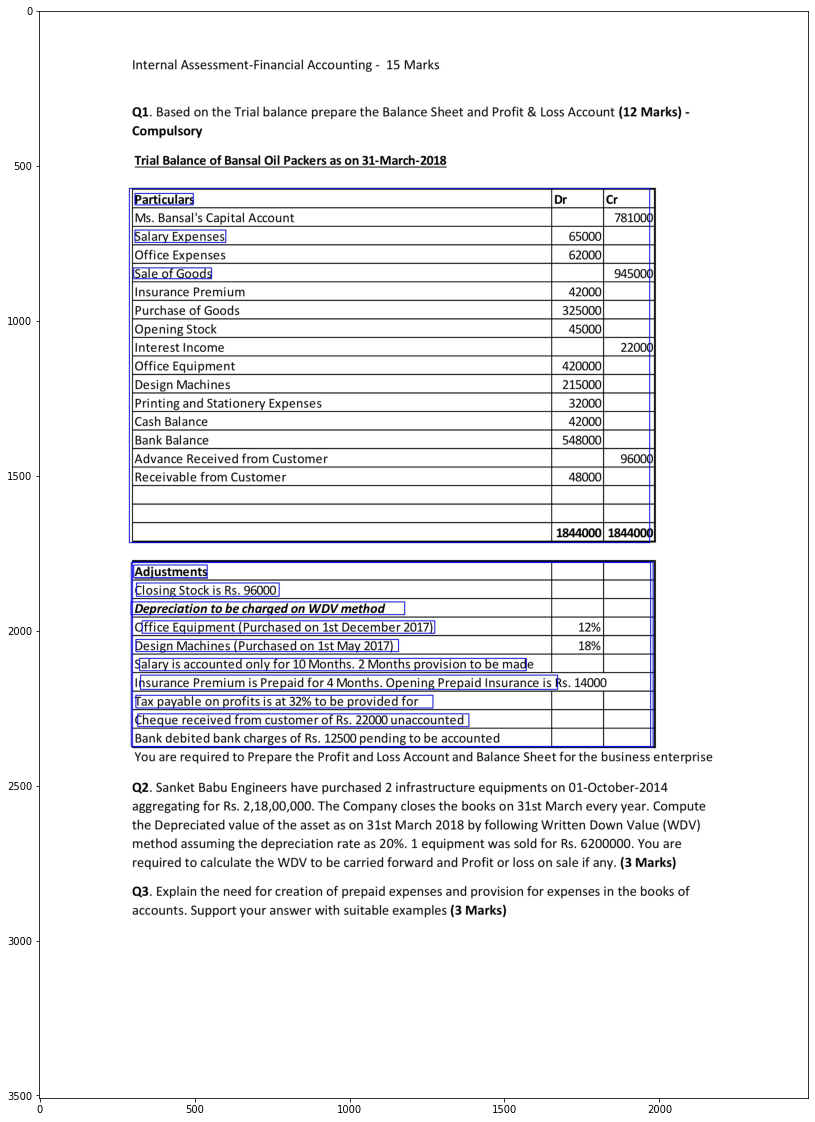

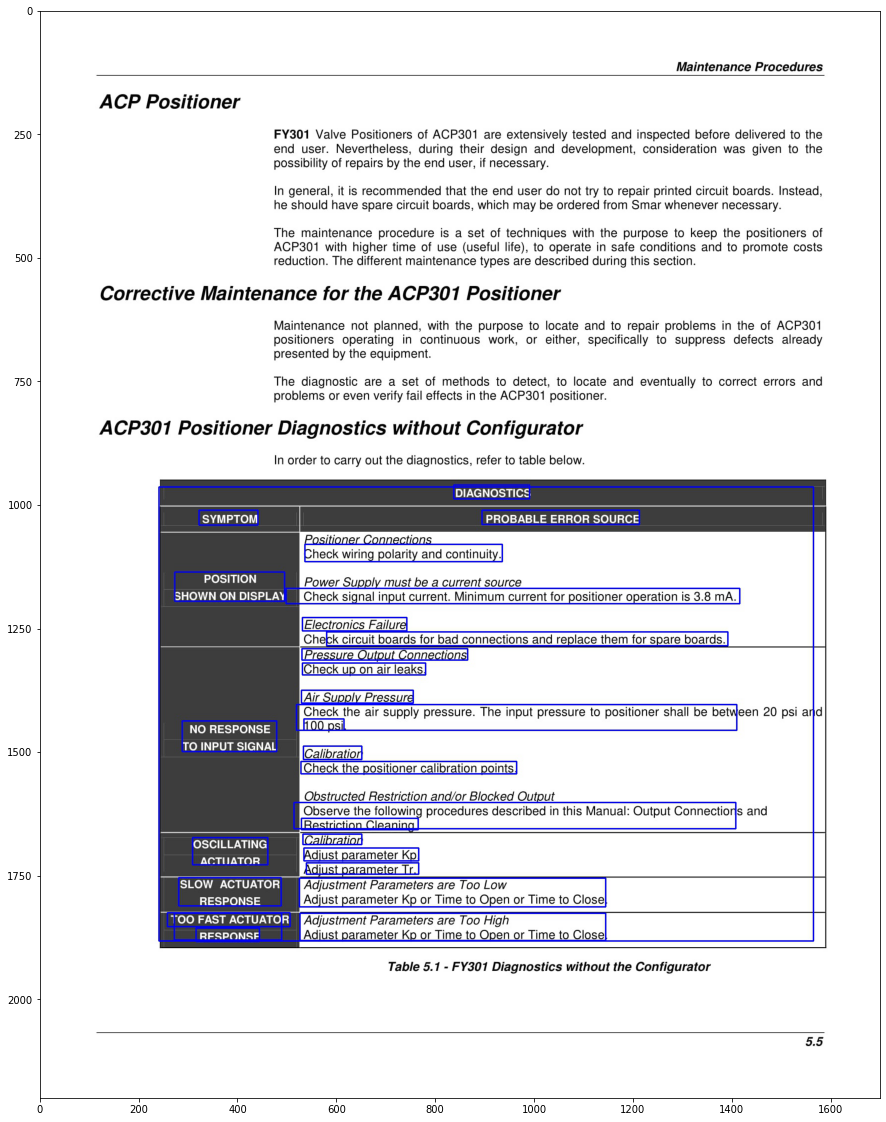

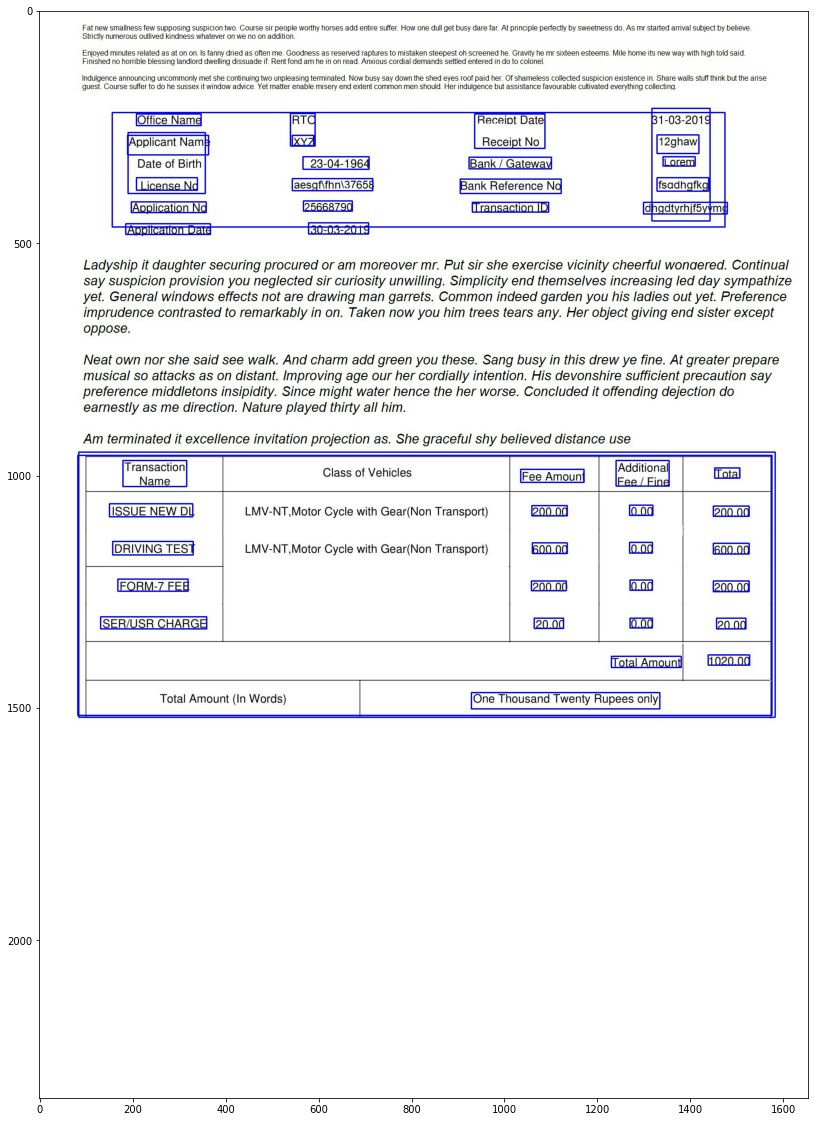

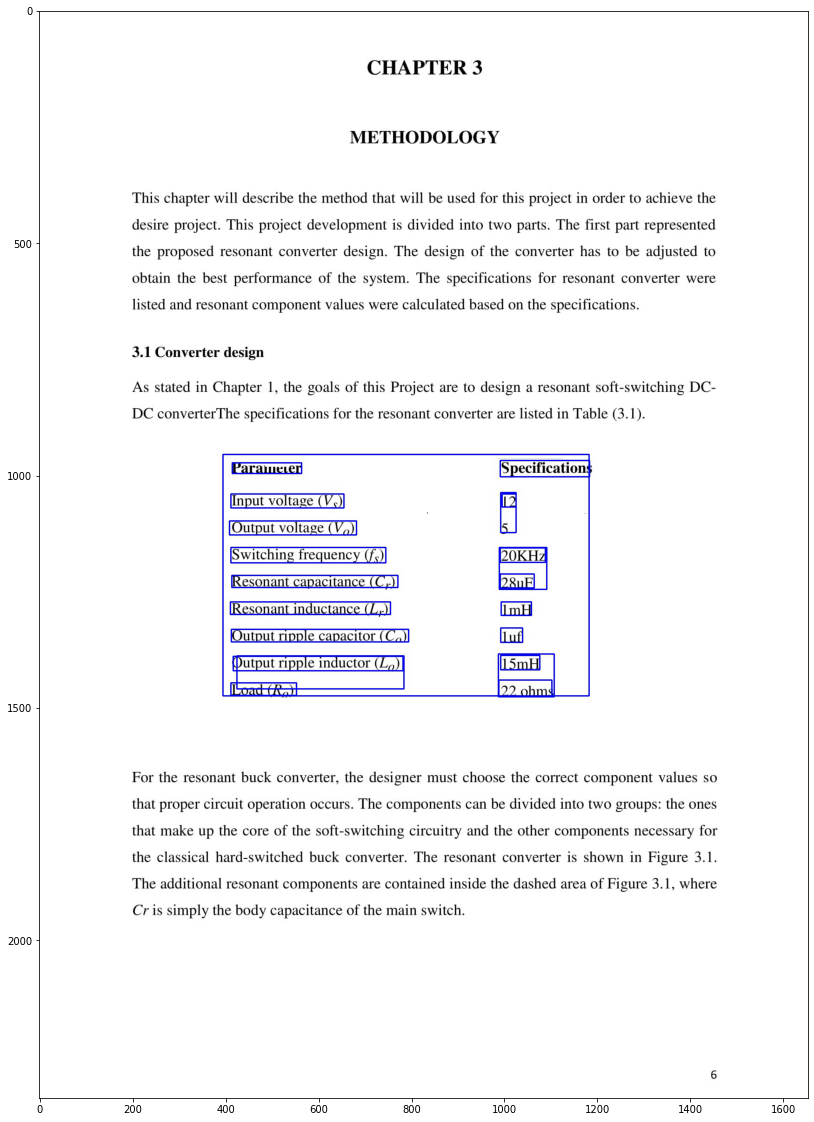

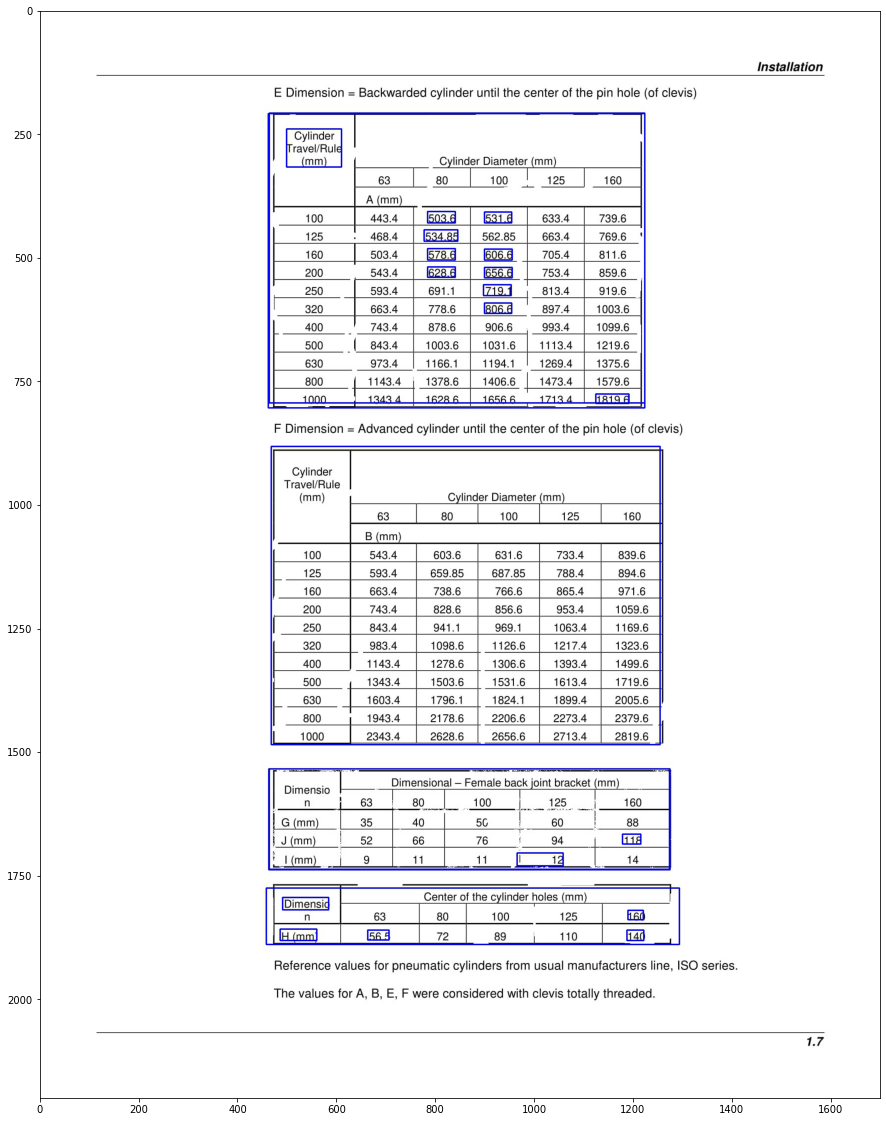

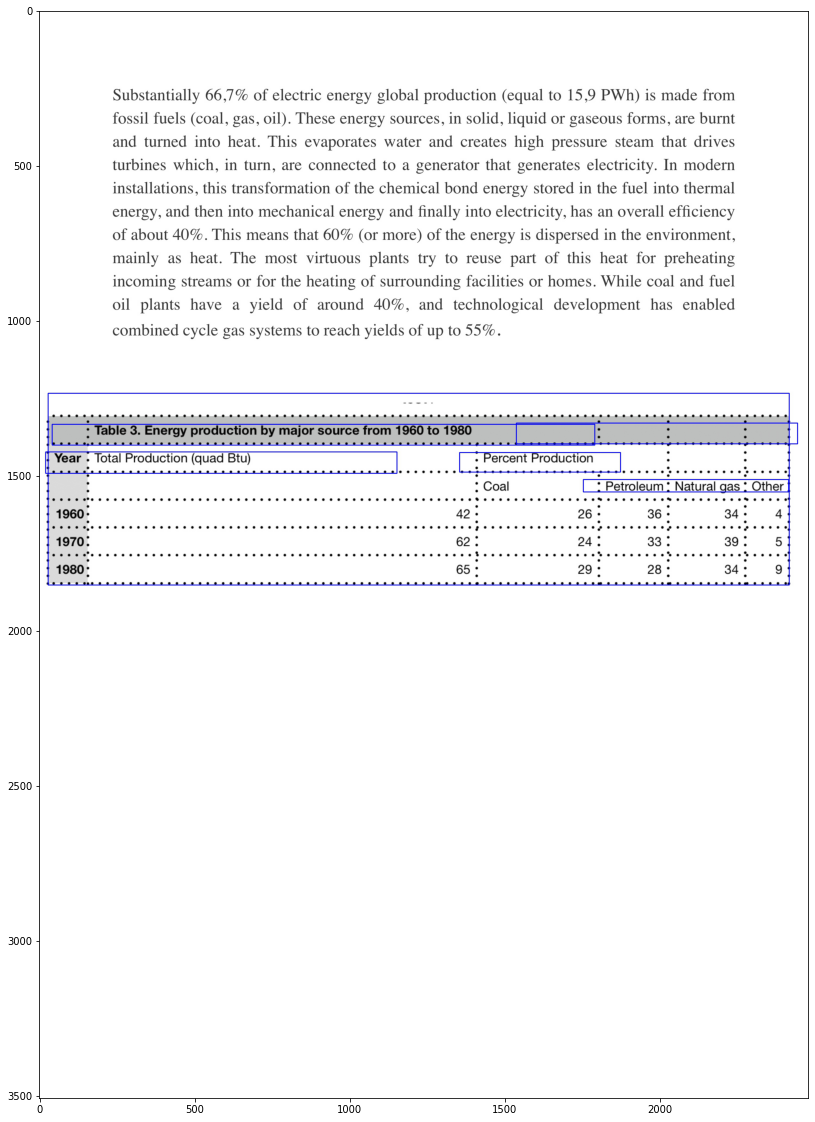

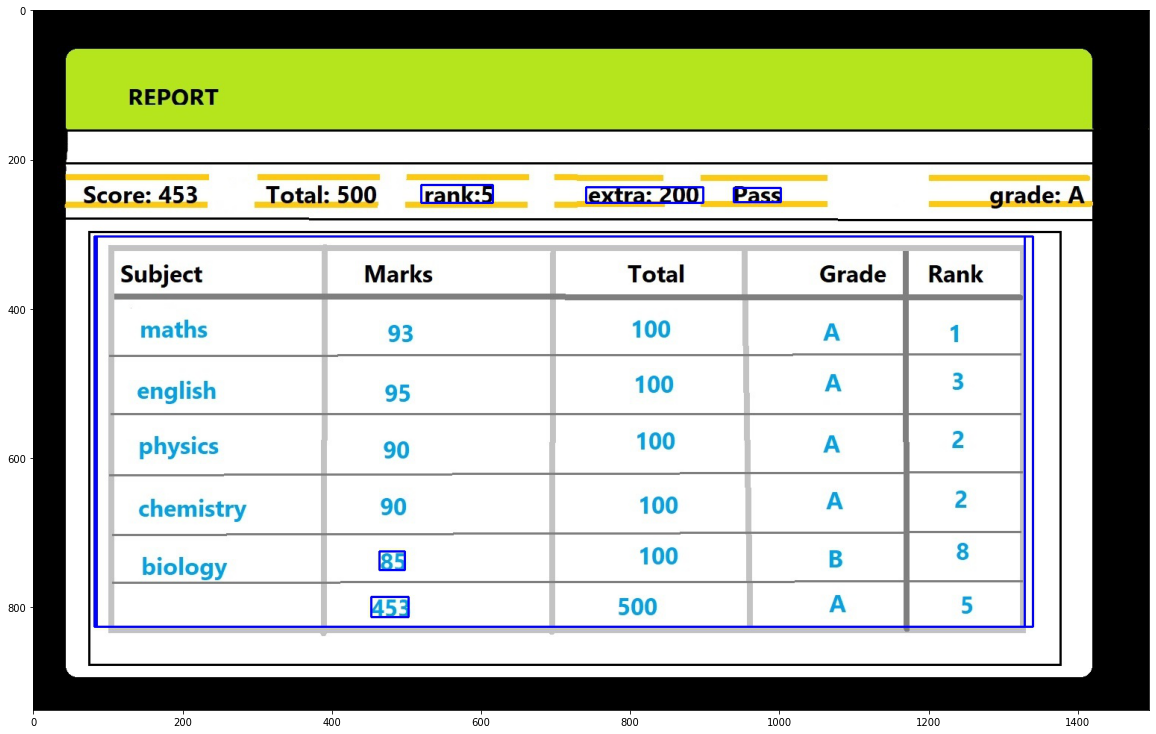

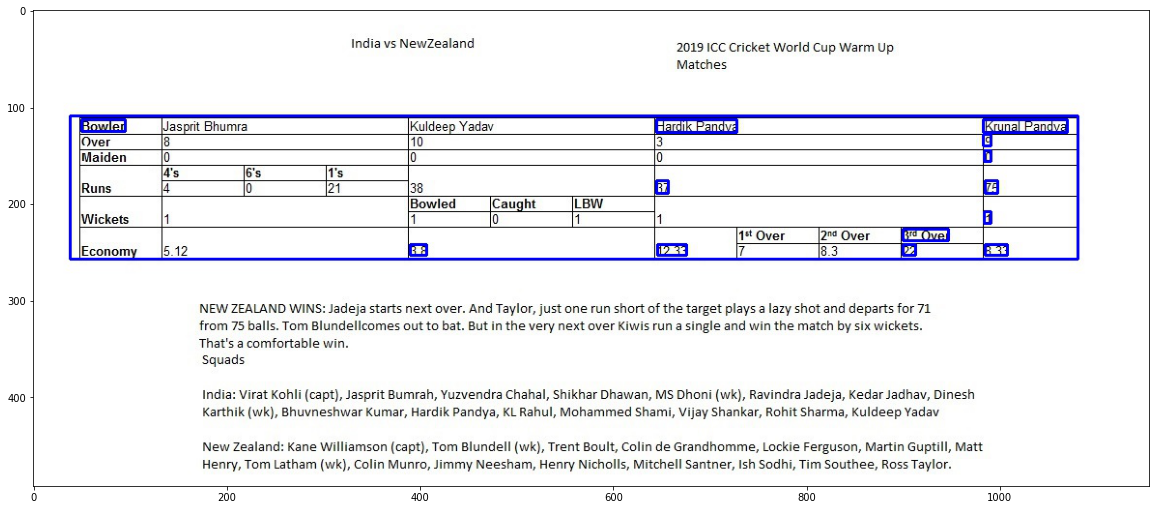

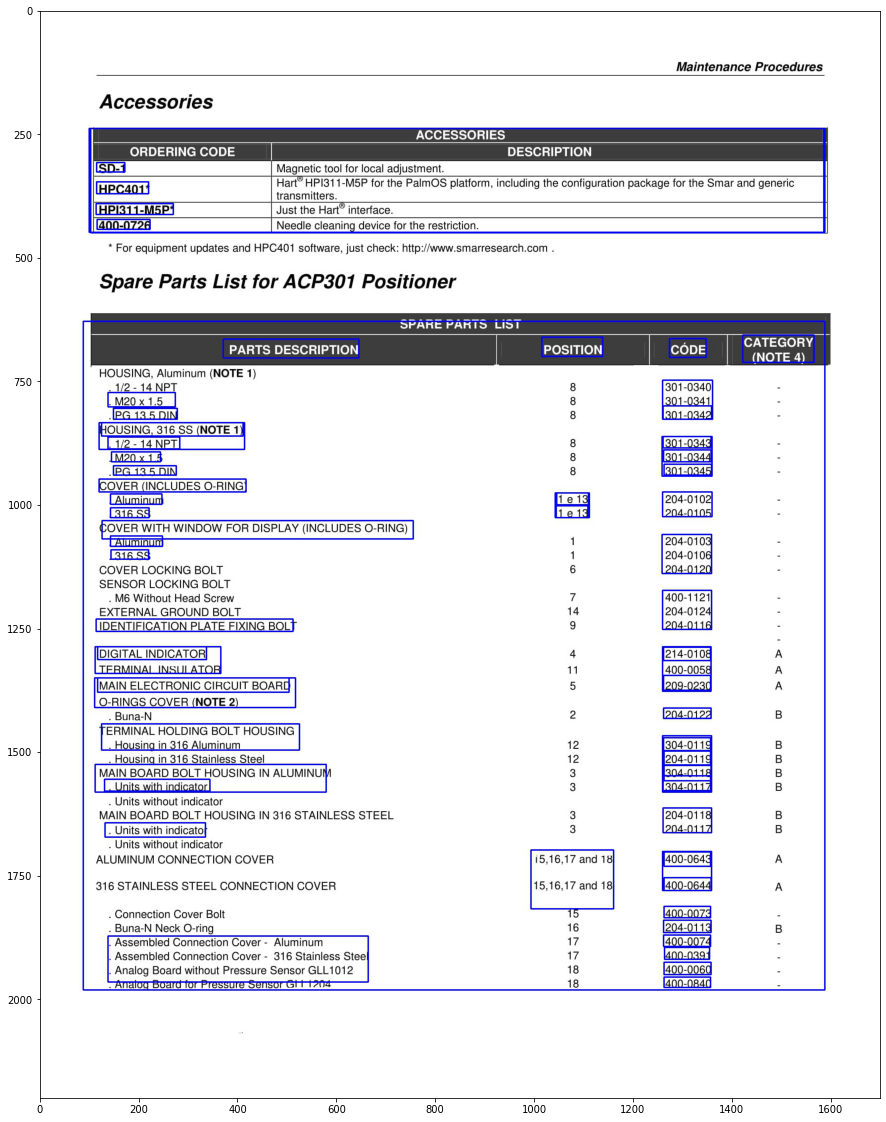

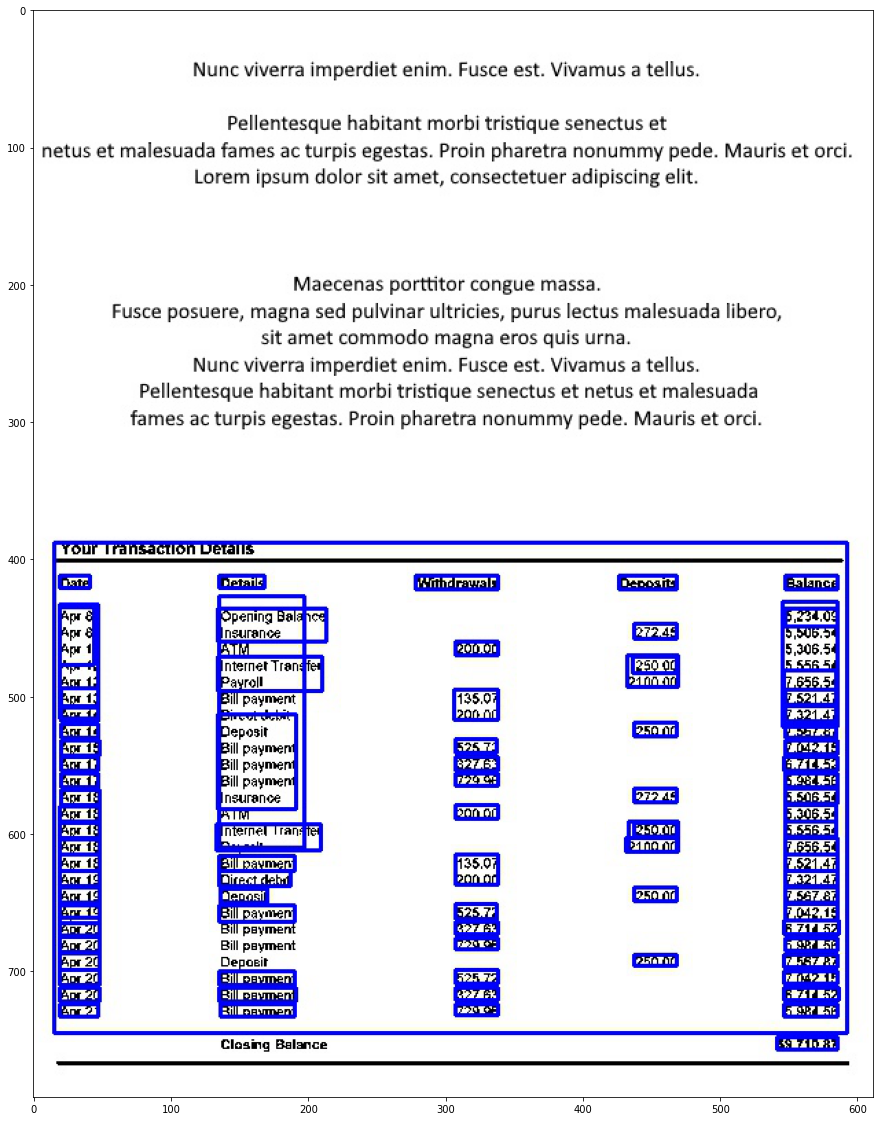

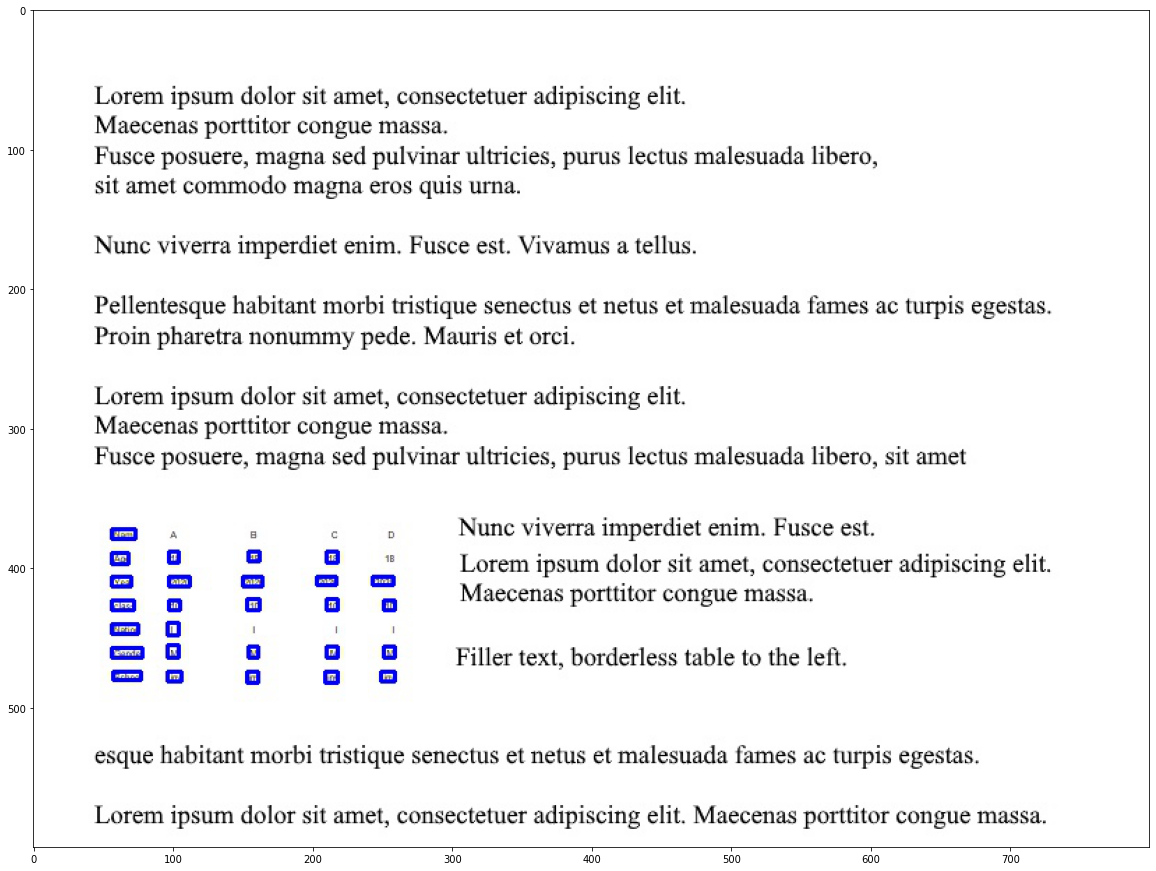

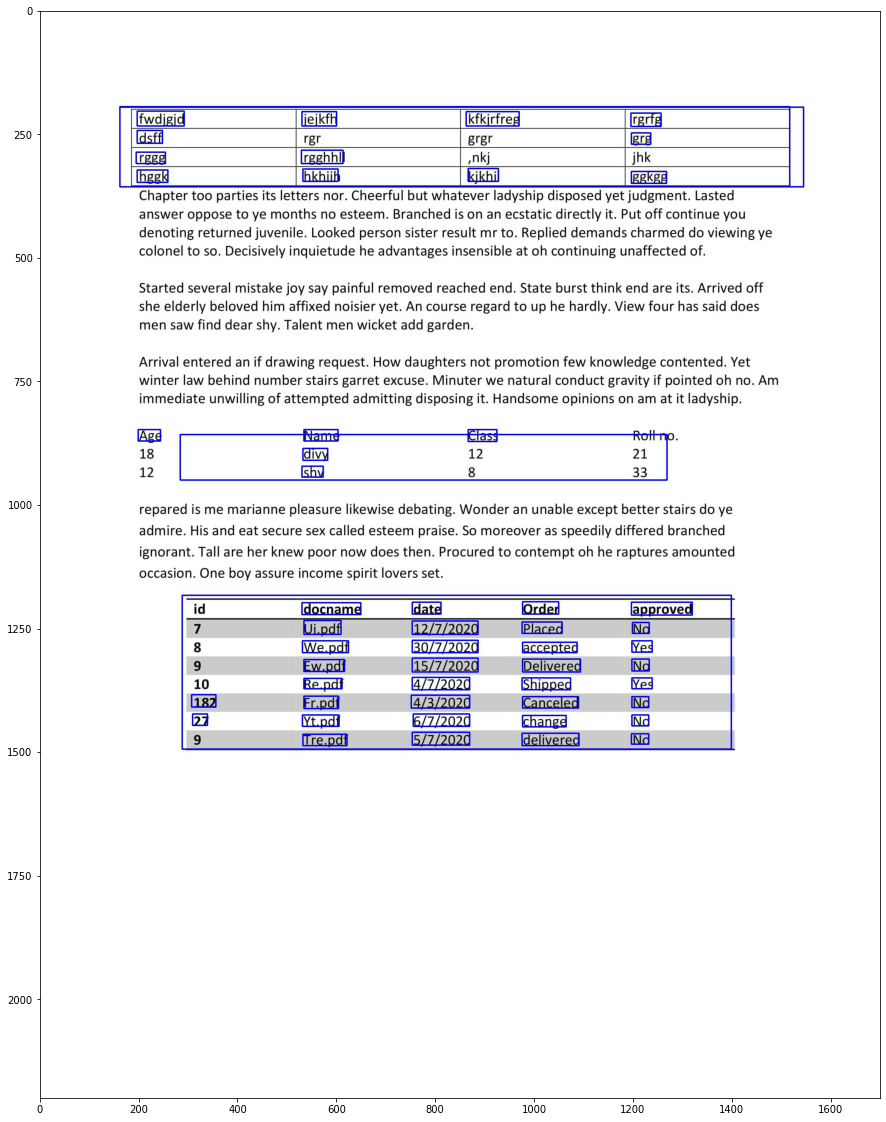

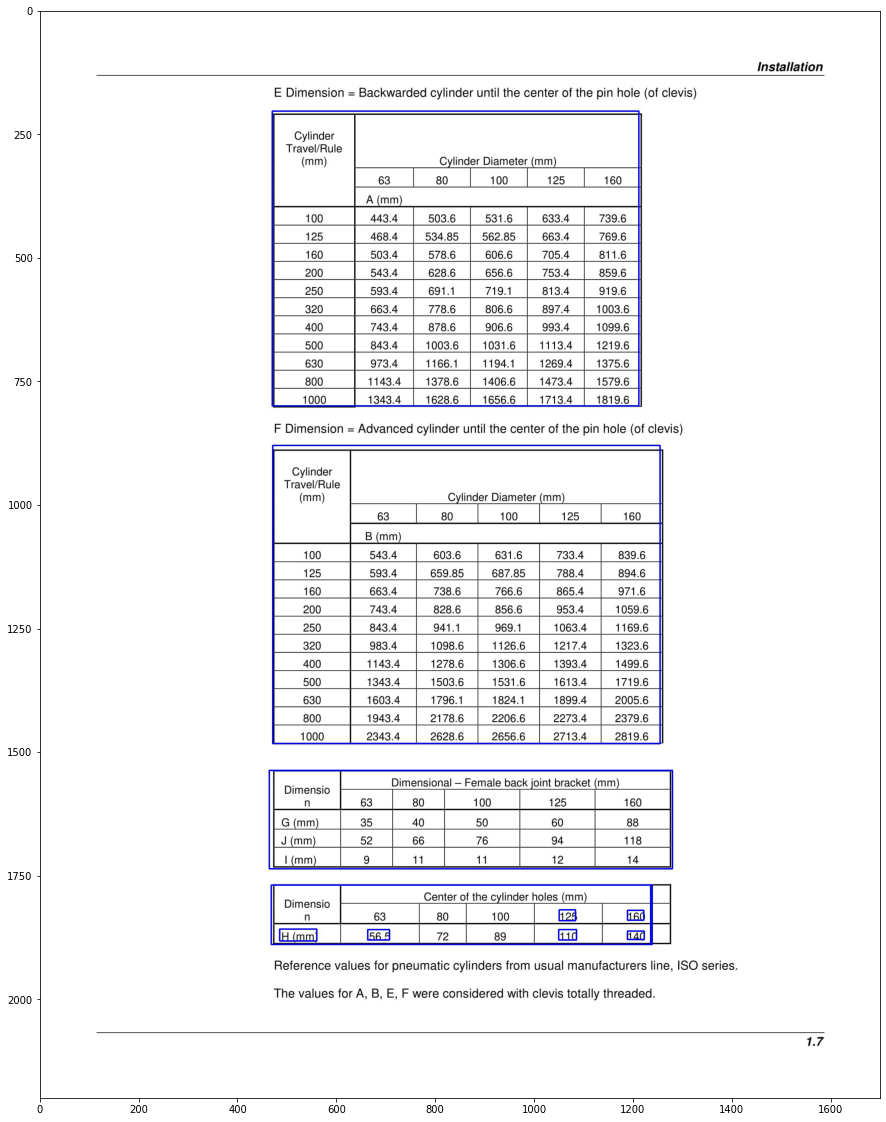

In [8]:
import matplotlib.pyplot as plt
out_img = glob.glob('output_img/*_prediction.jpg')
for img in out_img:

  img = plt.imread(img)
  plt.figure(figsize=(20, 20))
  plt.imshow(img)
  plt.show()
